In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import binary_crossentropy
from sklearn.metrics import classification_report

In [3]:
#from google.colab import drive
#drive.mount('/content/drive/MyDrive/kaggle datasets/playground-series-s4e1/train.csv')

In [4]:
train = pd.read_csv("/content/drive/MyDrive/kaggle datasets/playground-series-s4e1/train.csv")

In [5]:
train

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited  
0             181449.97       0  
1              49503.50       0  
2             184866.69       0  
3              84560.88       0  
4              15068.83       0  
...                 ...     ...  
165029        131834.75       0  
165030        131834.45       0  
165031        127429.56       0  
165032         71173.03       0  
165033         61581.79       1  

[165034 rows x 14 columns]

In [6]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
train = train.dropna()

In [8]:
train.shape

(165034, 14)

## **EDA**

In [9]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
train['Tenure'].value_counts()

2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: Tenure, dtype: int64

<Axes: xlabel='Age'>

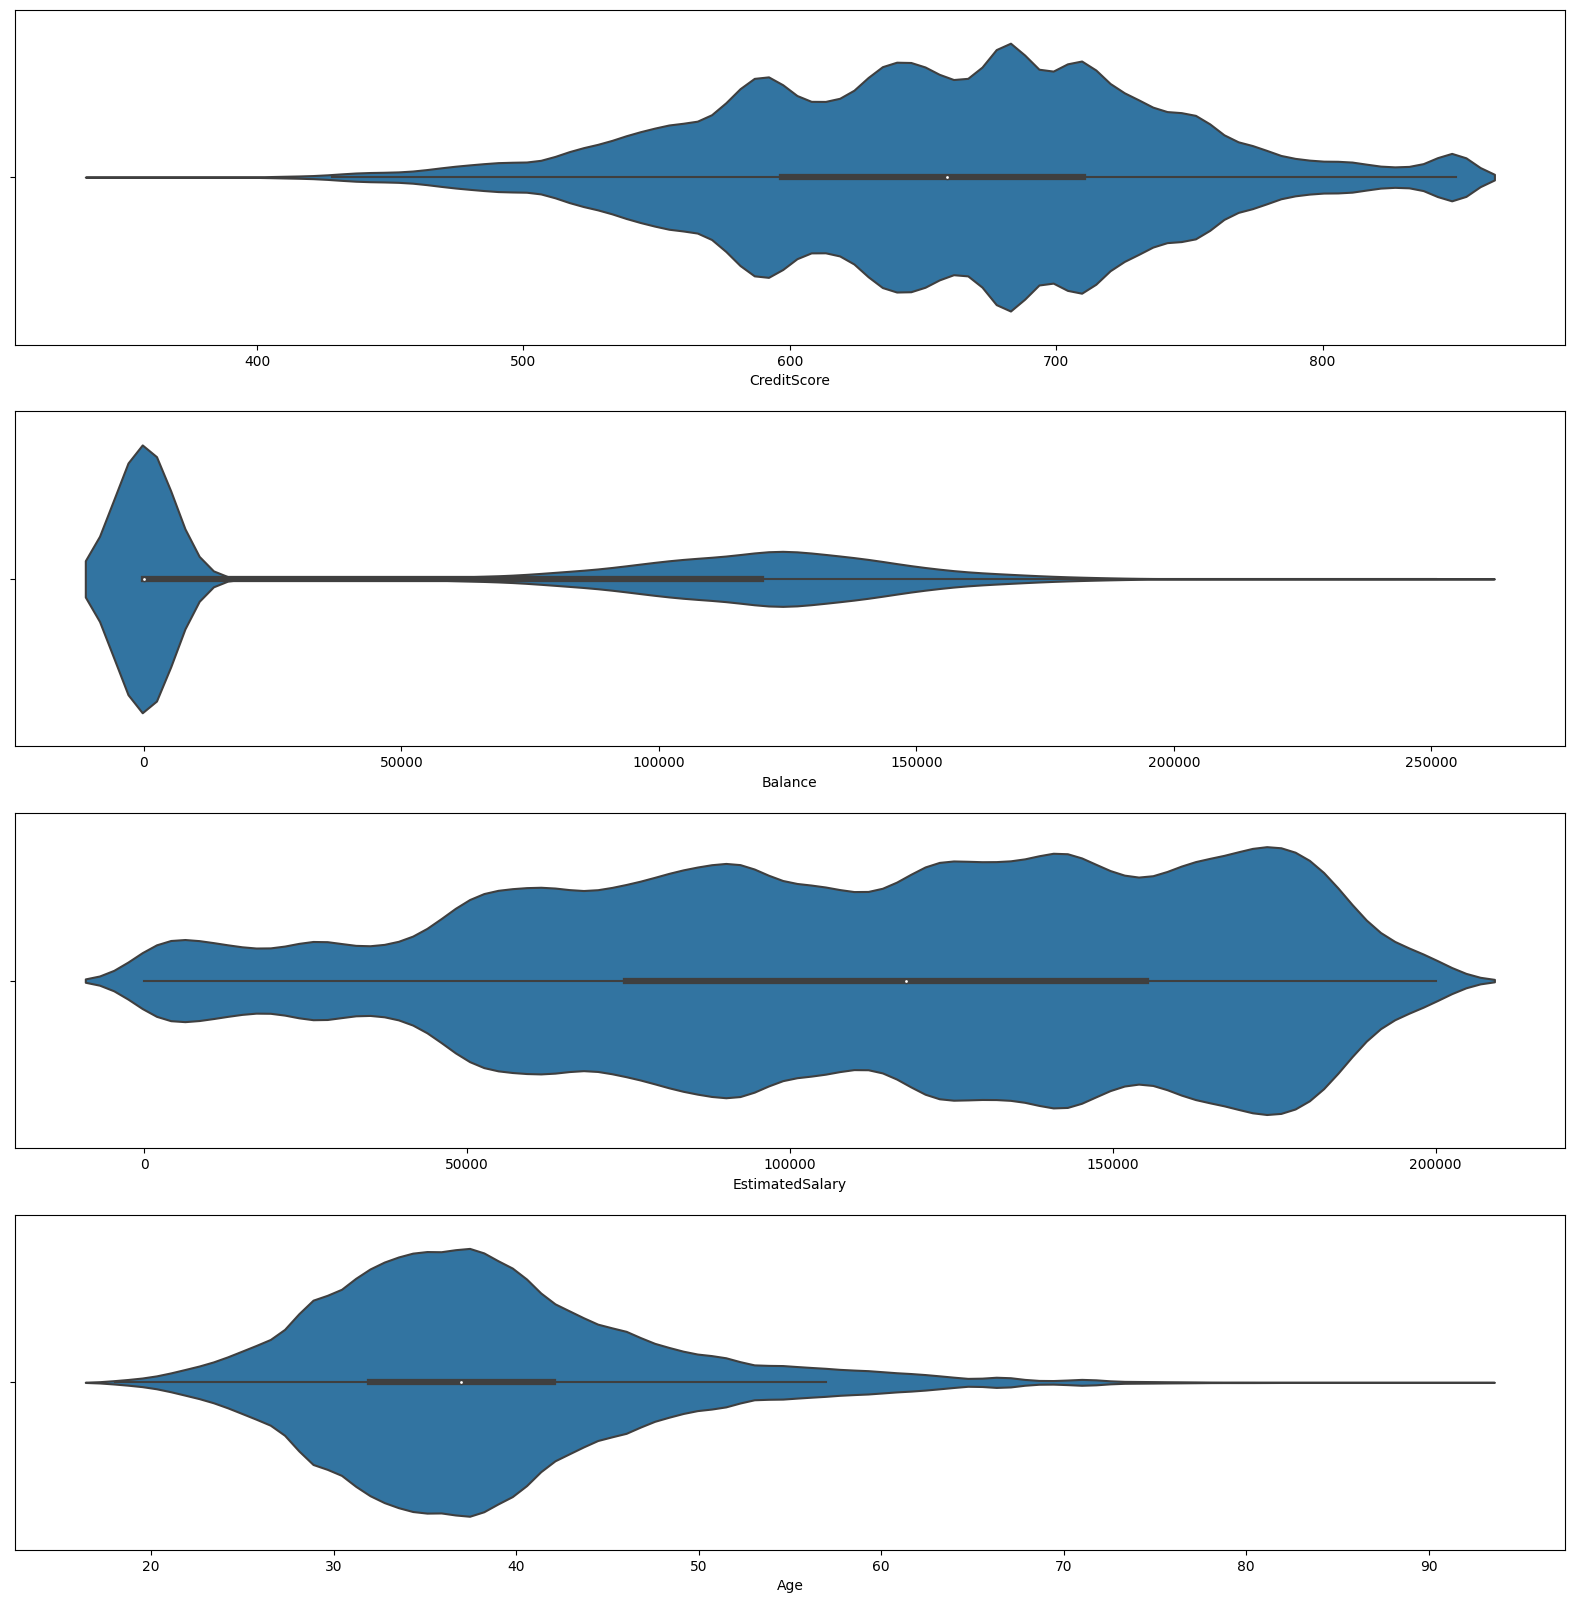

In [12]:
fig, axes = plt.subplots(4,1, figsize = (20,20))
sns.violinplot(x = 'CreditScore', data = train, ax = axes[0])
sns.violinplot(x = 'Balance', data = train, ax = axes[1])
sns.violinplot(x = 'EstimatedSalary', data = train, ax = axes[2])
sns.violinplot(x = 'Age', data = train, ax = axes[3])
#sns.violinplot(x = 'Tenure', data = train, ax = axes[4])

<Axes: xlabel='Age'>

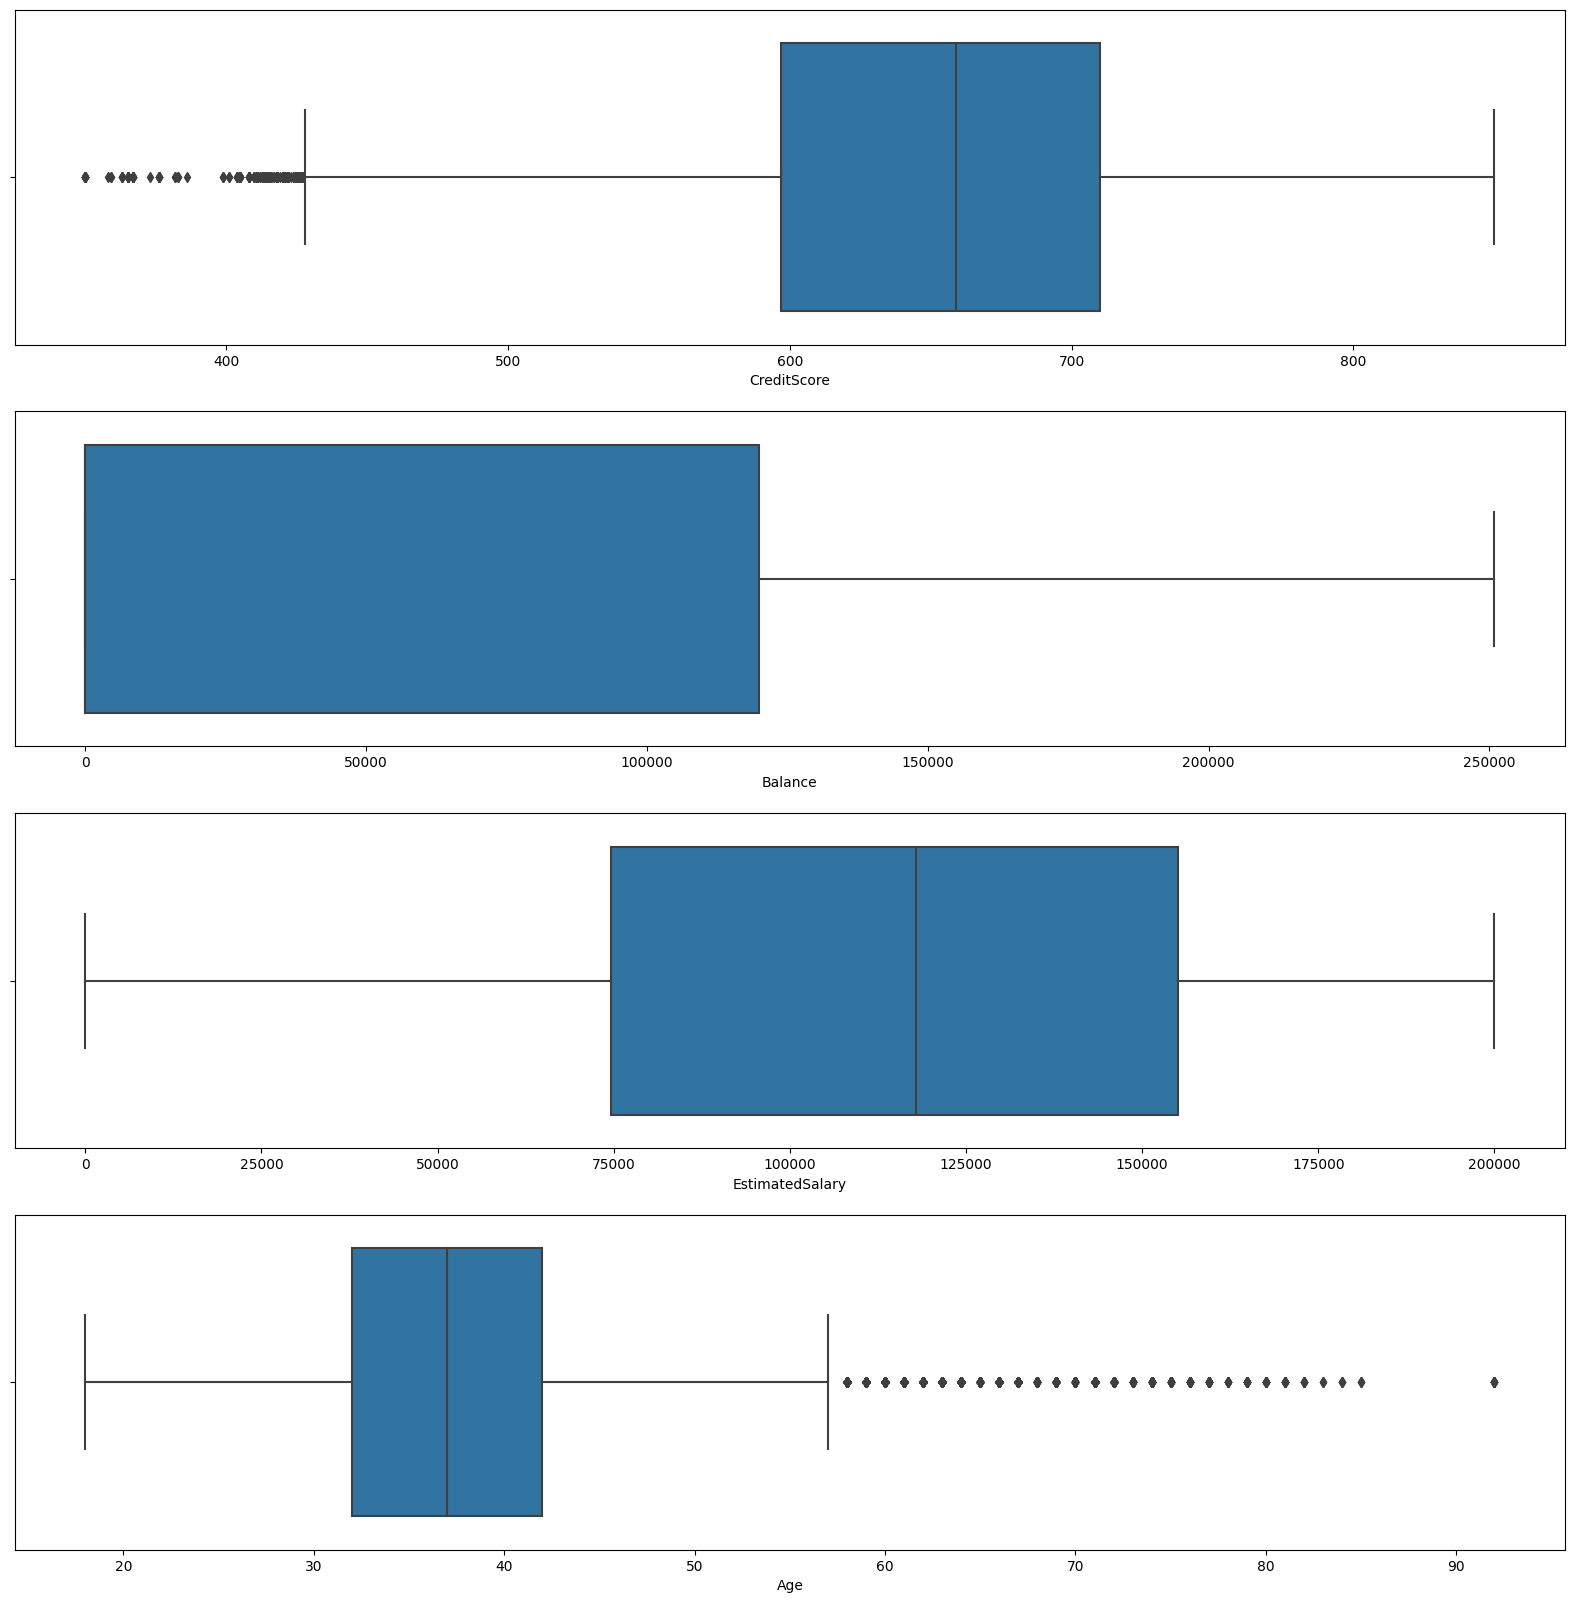

In [13]:
fig, axes = plt.subplots(4,1, figsize = (20,20))
sns.boxplot(x = 'CreditScore', data = train, ax = axes[0])
sns.boxplot(x = 'Balance', data = train, ax = axes[1])
sns.boxplot(x = 'EstimatedSalary', data = train, ax = axes[2])
sns.boxplot(x = 'Age', data = train, ax = axes[3])

<Axes: xlabel='Age', ylabel='Density'>

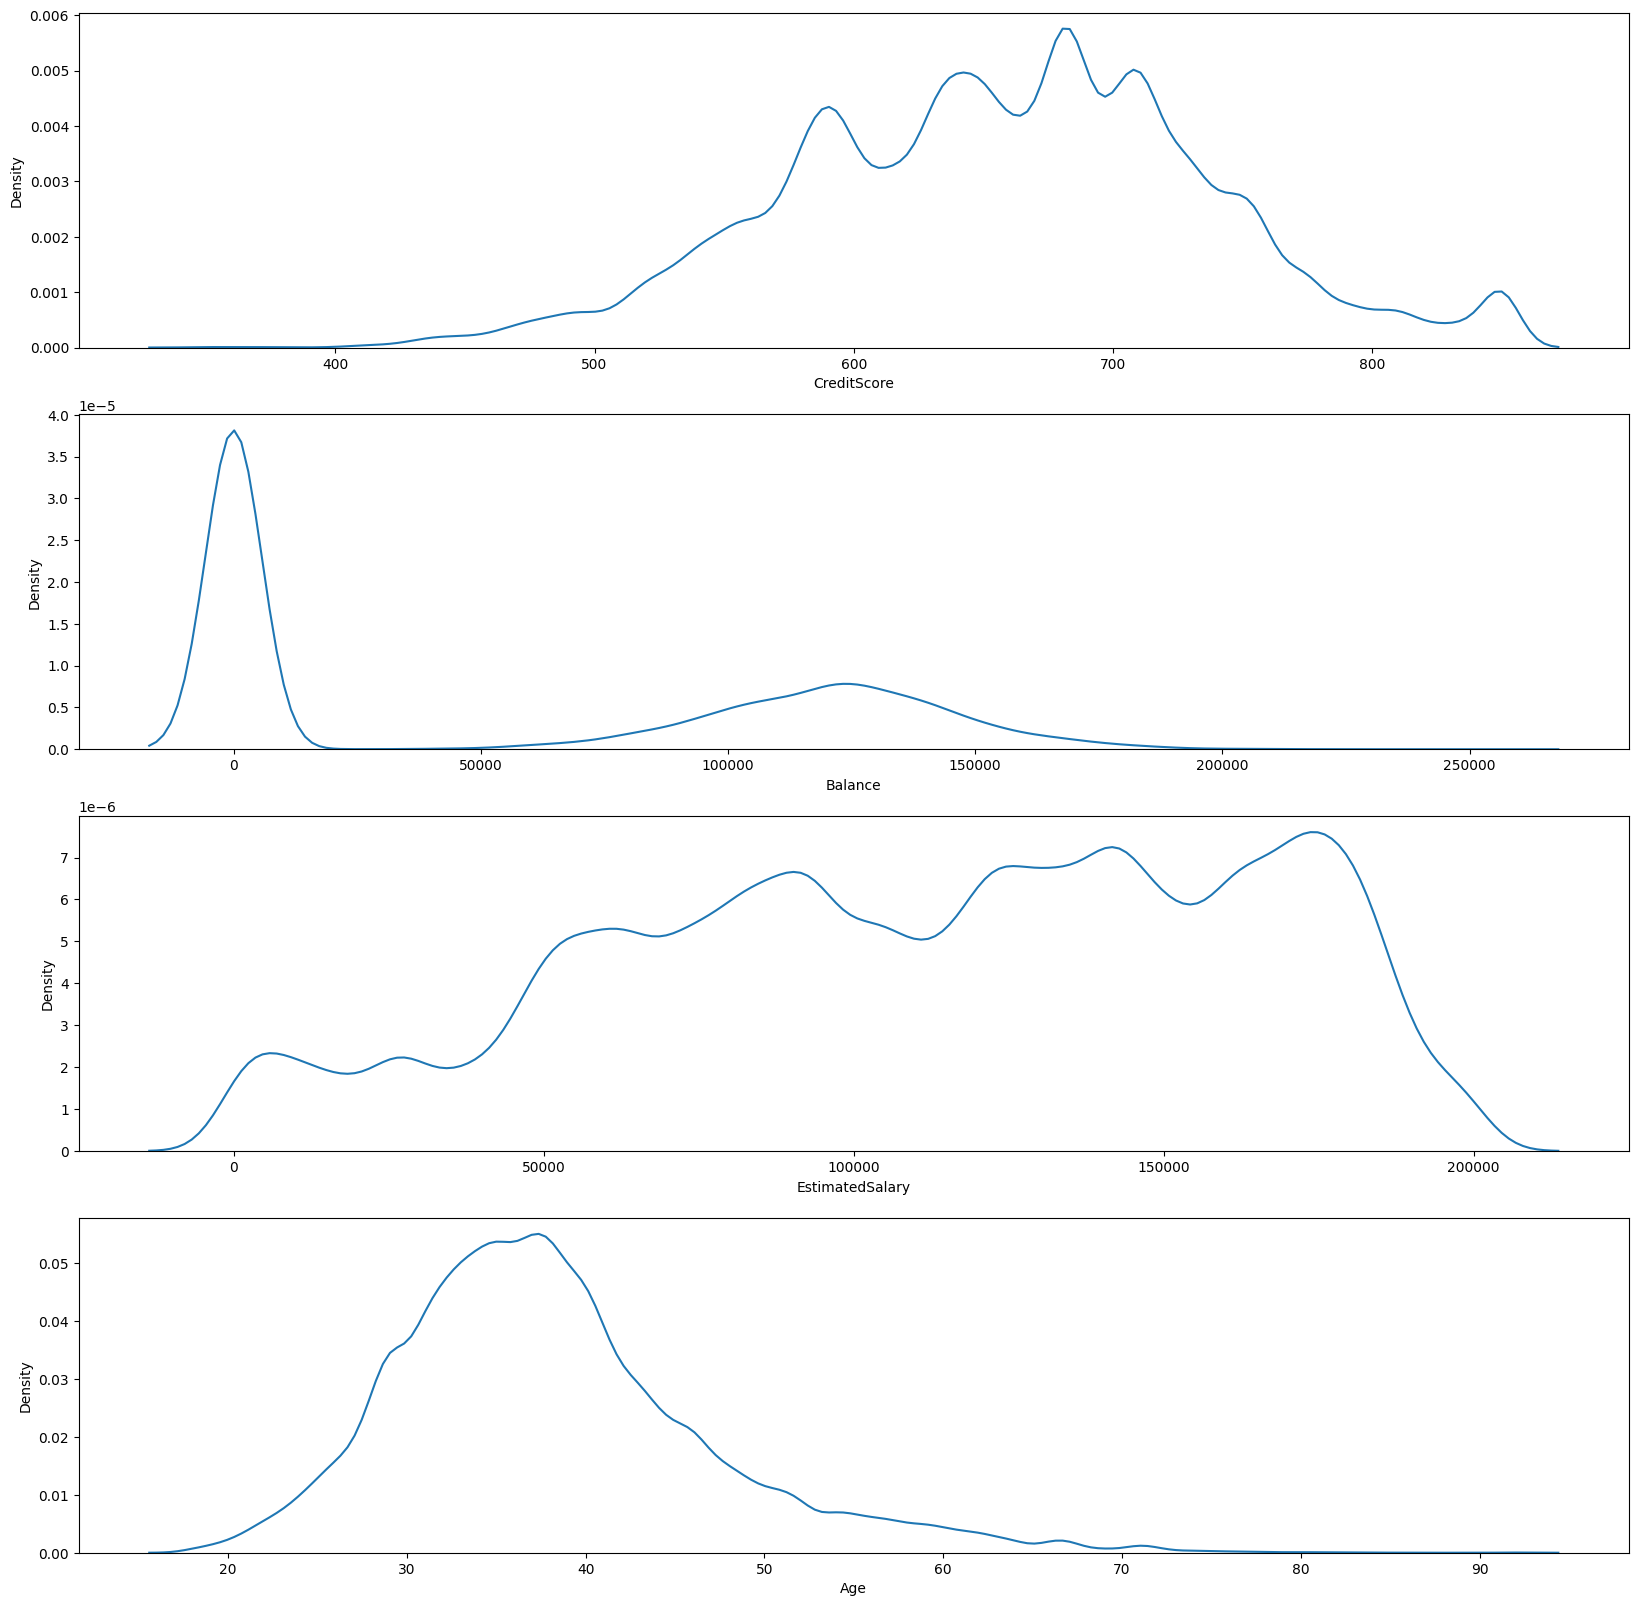

In [14]:
fig, axes = plt.subplots(4,1, figsize = (20,20))
sns.kdeplot(x = 'CreditScore', data = train, ax = axes[0])
sns.kdeplot(x = 'Balance', data = train, ax = axes[1])
sns.kdeplot(x = 'EstimatedSalary', data = train, ax = axes[2])
sns.kdeplot(x = 'Age', data = train, ax = axes[3])

<Axes: xlabel='Balance', ylabel='Age'>

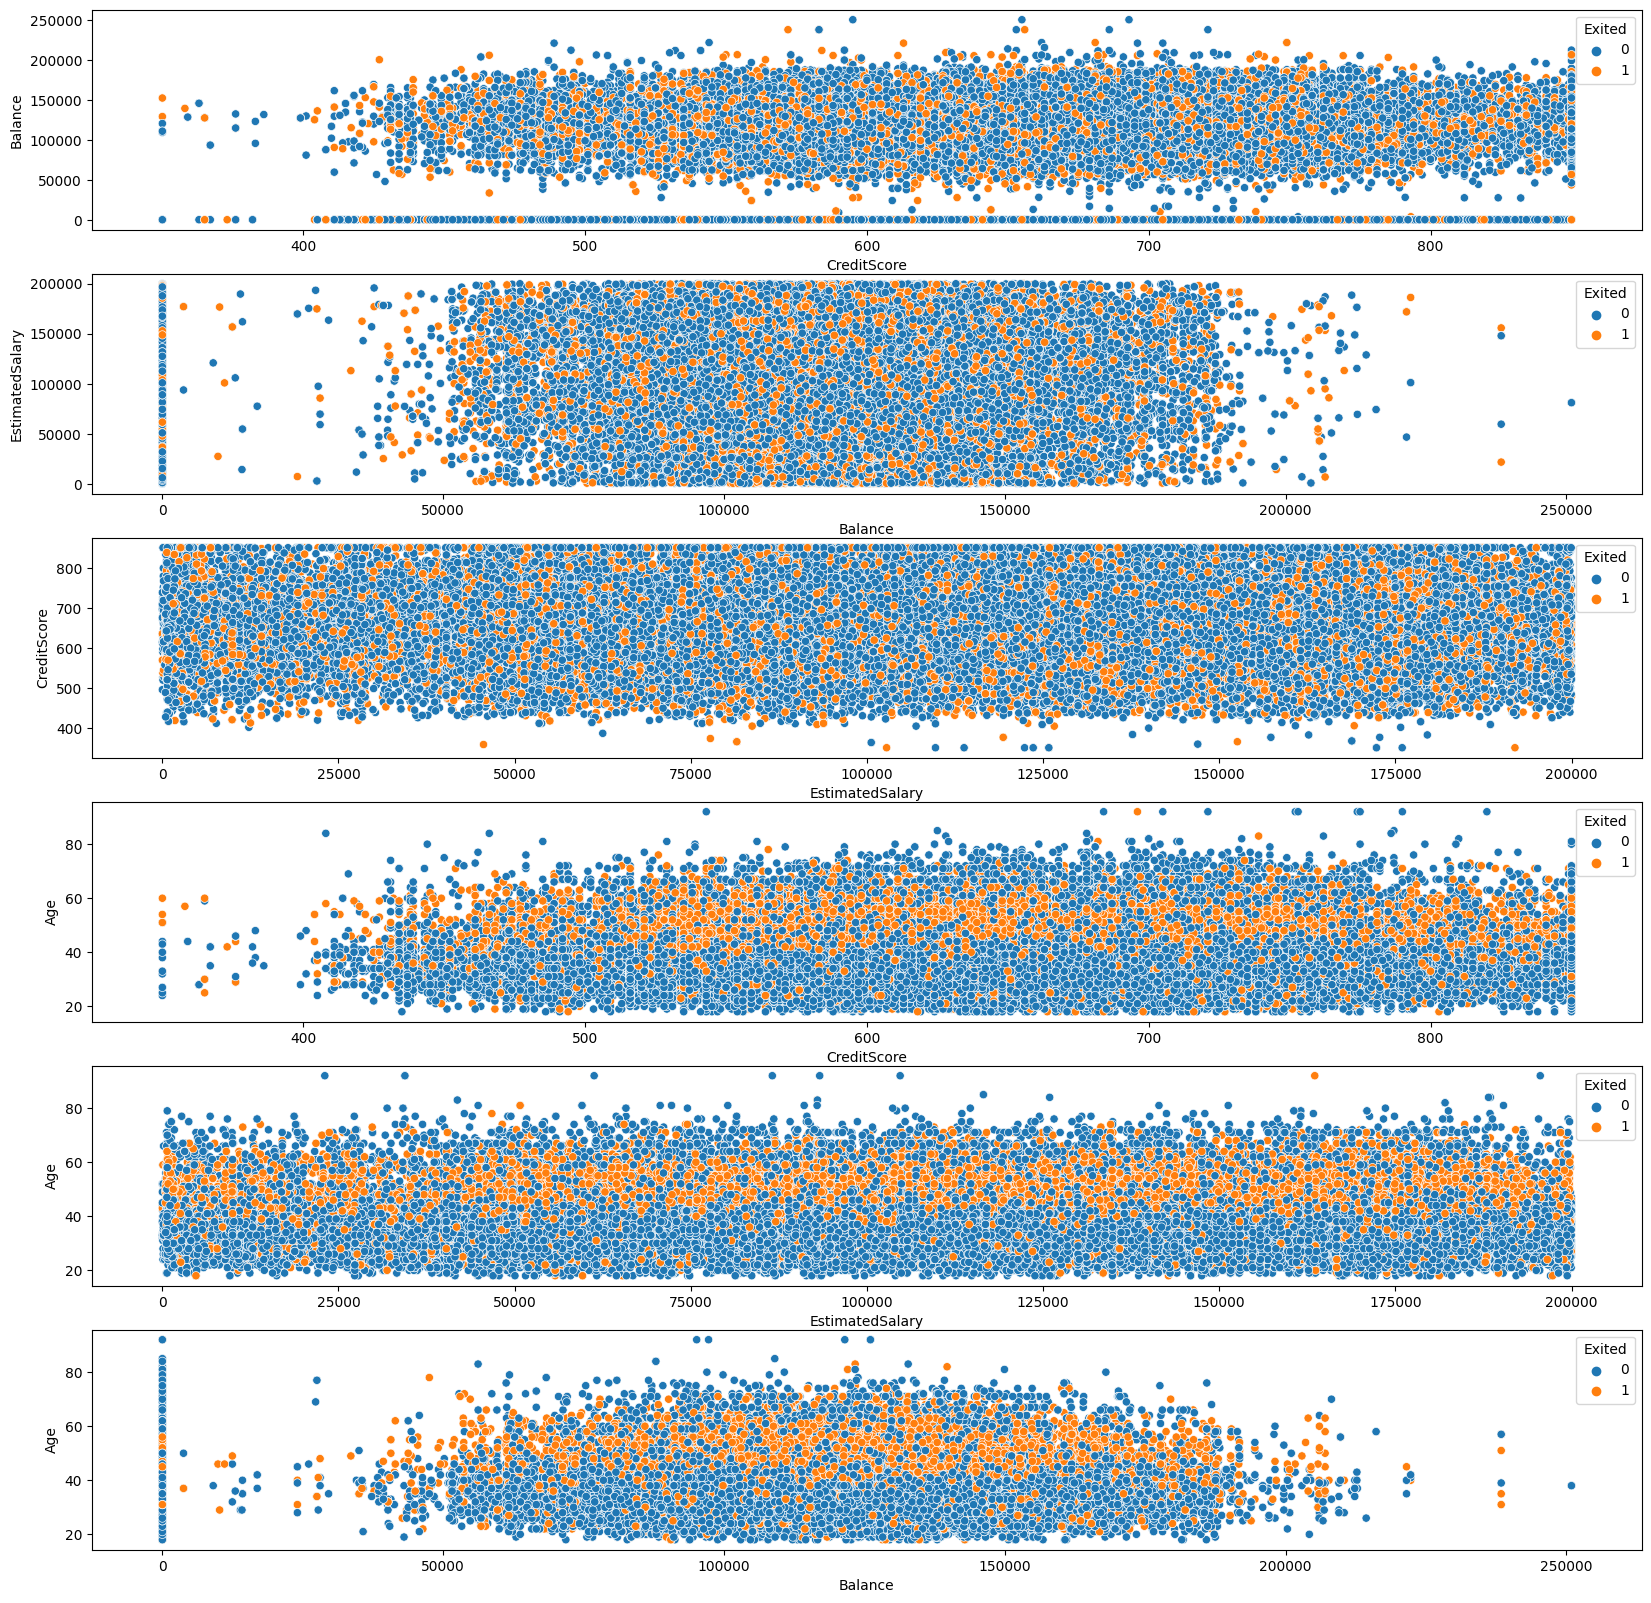

In [15]:
fig, axes = plt.subplots(6,1, figsize = (20,20))
sns.scatterplot(x = 'CreditScore', y = 'Balance' ,data = train, ax = axes[0], hue = 'Exited')
sns.scatterplot(x = 'Balance', y = 'EstimatedSalary', data = train, ax = axes[1], hue = 'Exited')
sns.scatterplot(x = 'EstimatedSalary', y = 'CreditScore', data = train, ax = axes[2], hue = 'Exited')
sns.scatterplot(x = 'CreditScore', y = 'Age', data = train, ax = axes[3], hue = 'Exited')
sns.scatterplot(x = 'EstimatedSalary', y = 'Age', data = train, ax = axes[4], hue = 'Exited')
sns.scatterplot(x = 'Balance', y = 'Age', data = train, ax = axes[5], hue = 'Exited')

<ipython-input-16-e8ad0e83cd92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train.corr()


<Axes: >

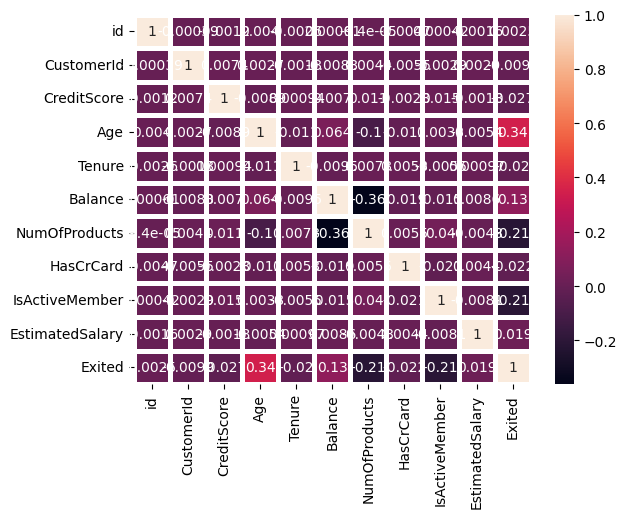

In [16]:
train_corr = train.corr()
sns.heatmap(train_corr, linewidths = 3.5, annot = True)

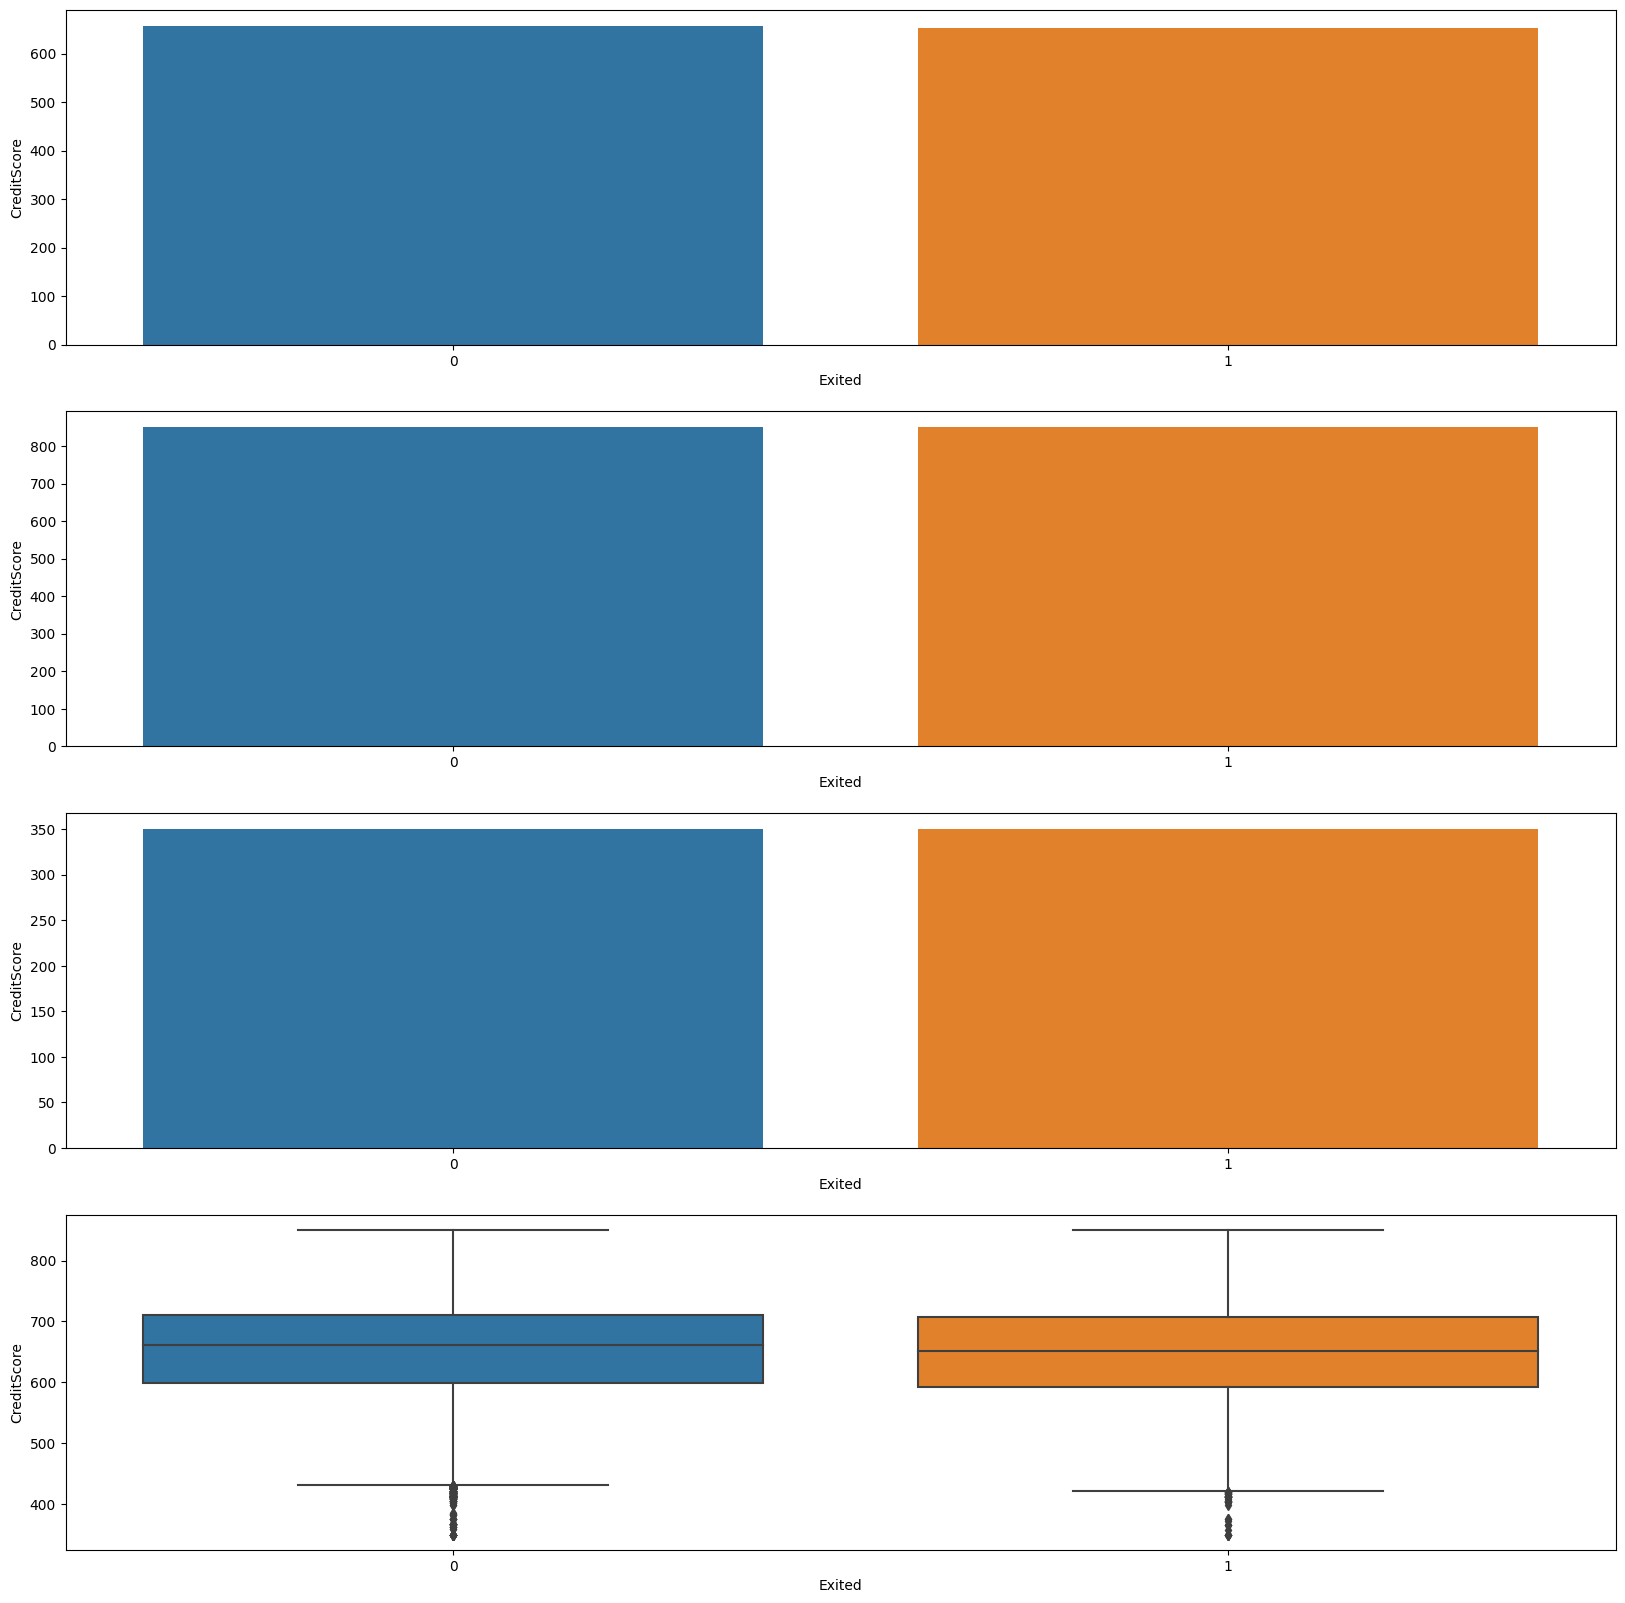

In [17]:
cred_scr_avg = pd.DataFrame(train.groupby('Exited')['CreditScore'].mean().reset_index().sort_values(by = 'CreditScore',ascending = True))
cred_scr_max = pd.DataFrame(train.groupby('Exited')['CreditScore'].max().reset_index().sort_values(by = 'CreditScore',ascending = True))
cred_scr_min = pd.DataFrame(train.groupby('Exited')['CreditScore'].min().reset_index().sort_values(by = 'CreditScore',ascending = True))

fig, axes = plt.subplots(4,1, figsize = (20,20))
sns.barplot(x = 'Exited', y = 'CreditScore' ,data = cred_scr_avg, ax = axes[0])
sns.barplot(x = 'Exited', y = 'CreditScore' ,data = cred_scr_max, ax = axes[1])
sns.barplot(x = 'Exited', y = 'CreditScore' ,data = cred_scr_min, ax = axes[2])
sns.boxplot(x = 'Exited', y ='CreditScore',data = train, ax = axes[3])

plt.show()

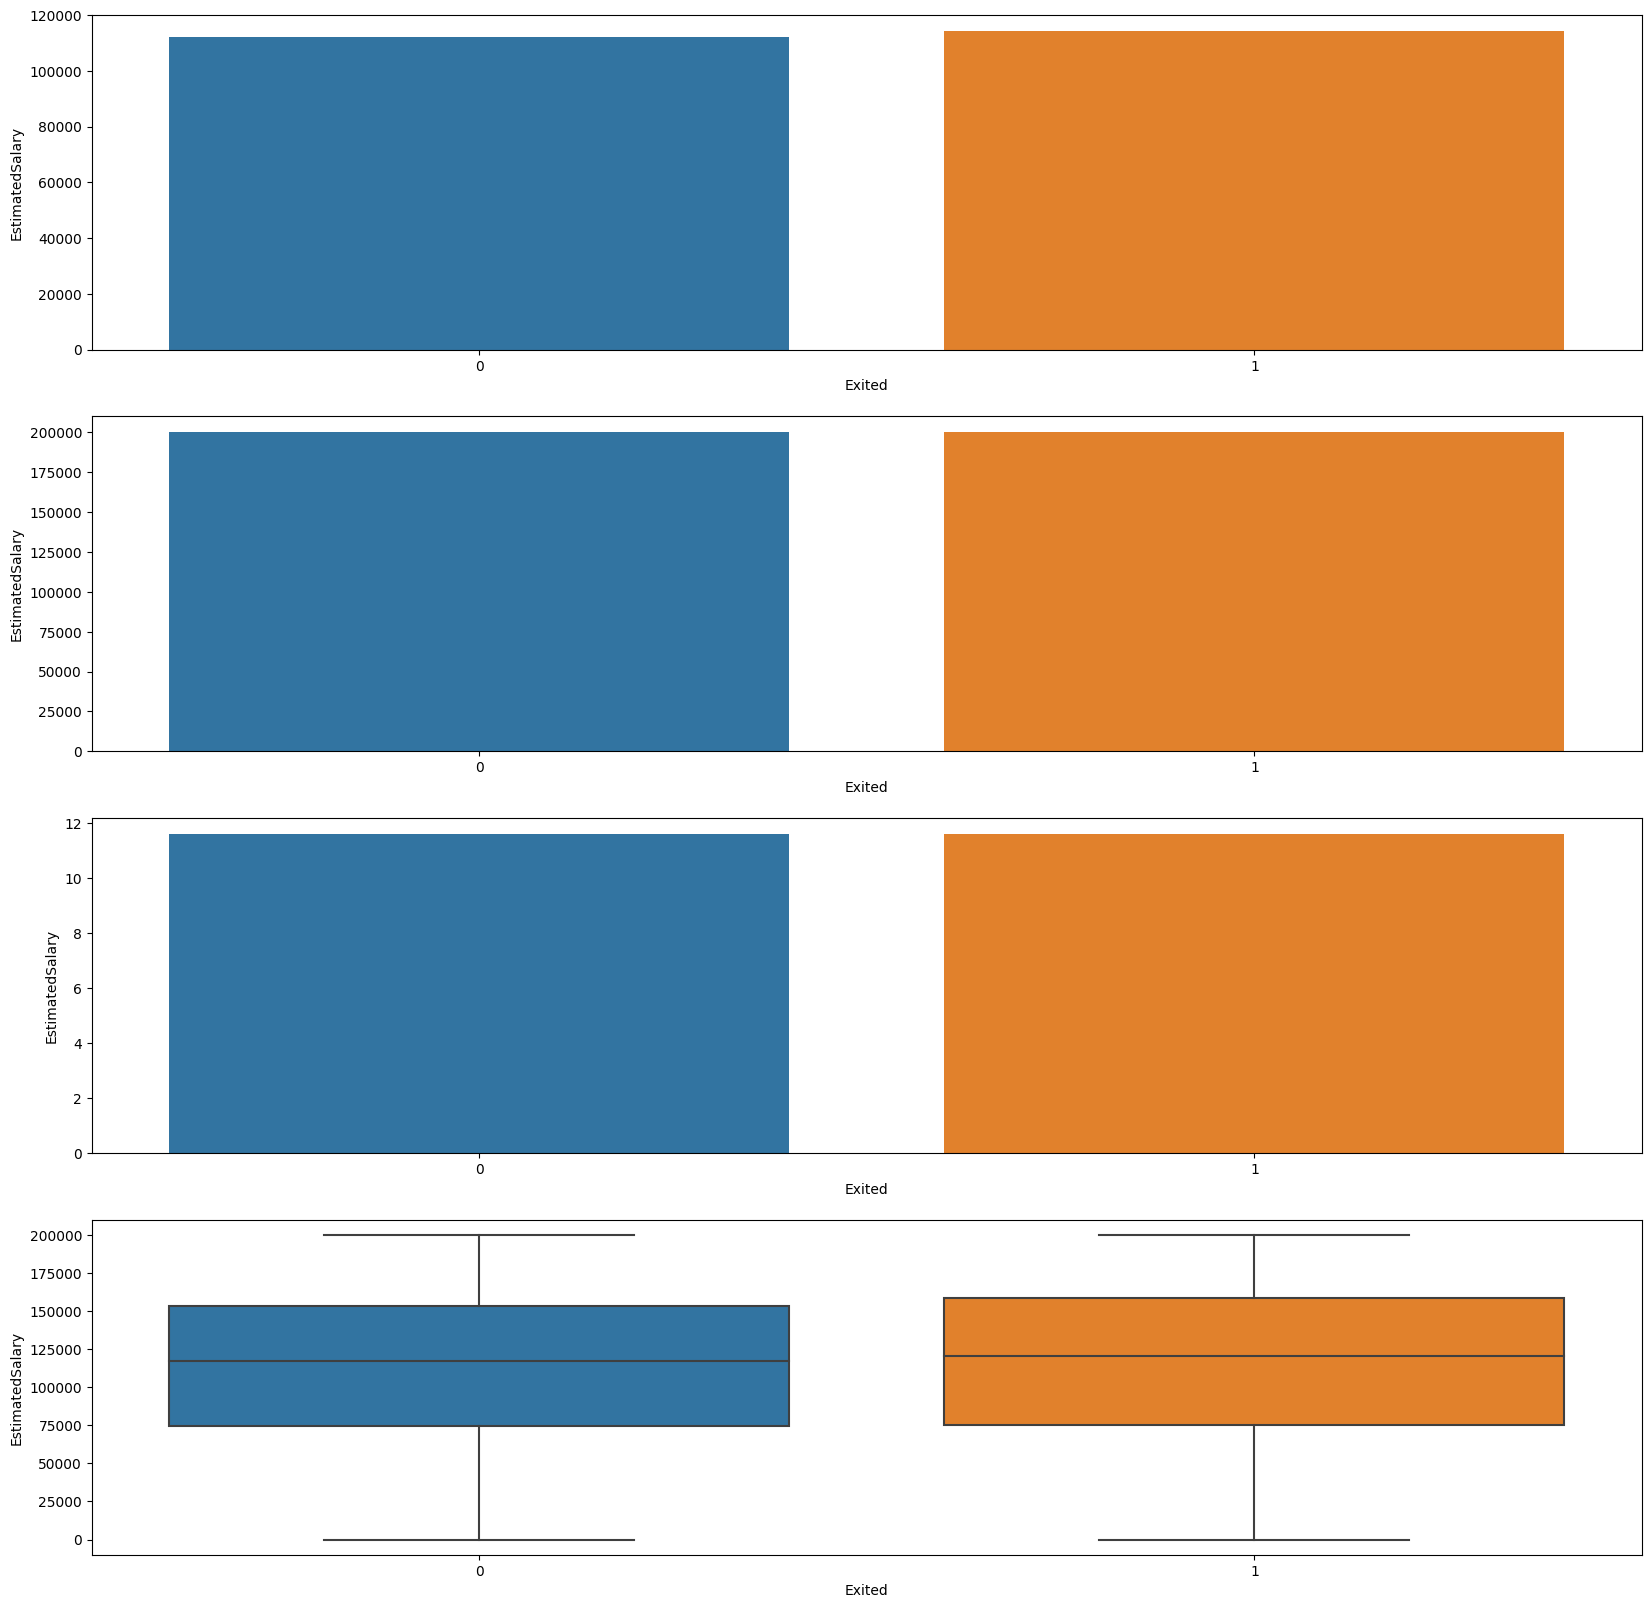

In [18]:
est_sal_avg = pd.DataFrame(train.groupby('Exited')['EstimatedSalary'].mean().reset_index().sort_values(by = 'EstimatedSalary',ascending = True))
est_sal_max = pd.DataFrame(train.groupby('Exited')['EstimatedSalary'].max().reset_index().sort_values(by = 'EstimatedSalary',ascending = True))
est_sal_min = pd.DataFrame(train.groupby('Exited')['EstimatedSalary'].min().reset_index().sort_values(by = 'EstimatedSalary',ascending = True))

fig, axes = plt.subplots(4,1, figsize = (20,20))
sns.barplot(x = 'Exited', y = 'EstimatedSalary' ,data = est_sal_avg, ax = axes[0])
sns.barplot(x = 'Exited', y = 'EstimatedSalary' ,data = est_sal_max, ax = axes[1])
sns.barplot(x = 'Exited', y = 'EstimatedSalary' ,data = est_sal_min, ax = axes[2])
sns.boxplot(x = 'Exited', y ='EstimatedSalary',data = train, ax = axes[3])

plt.show()

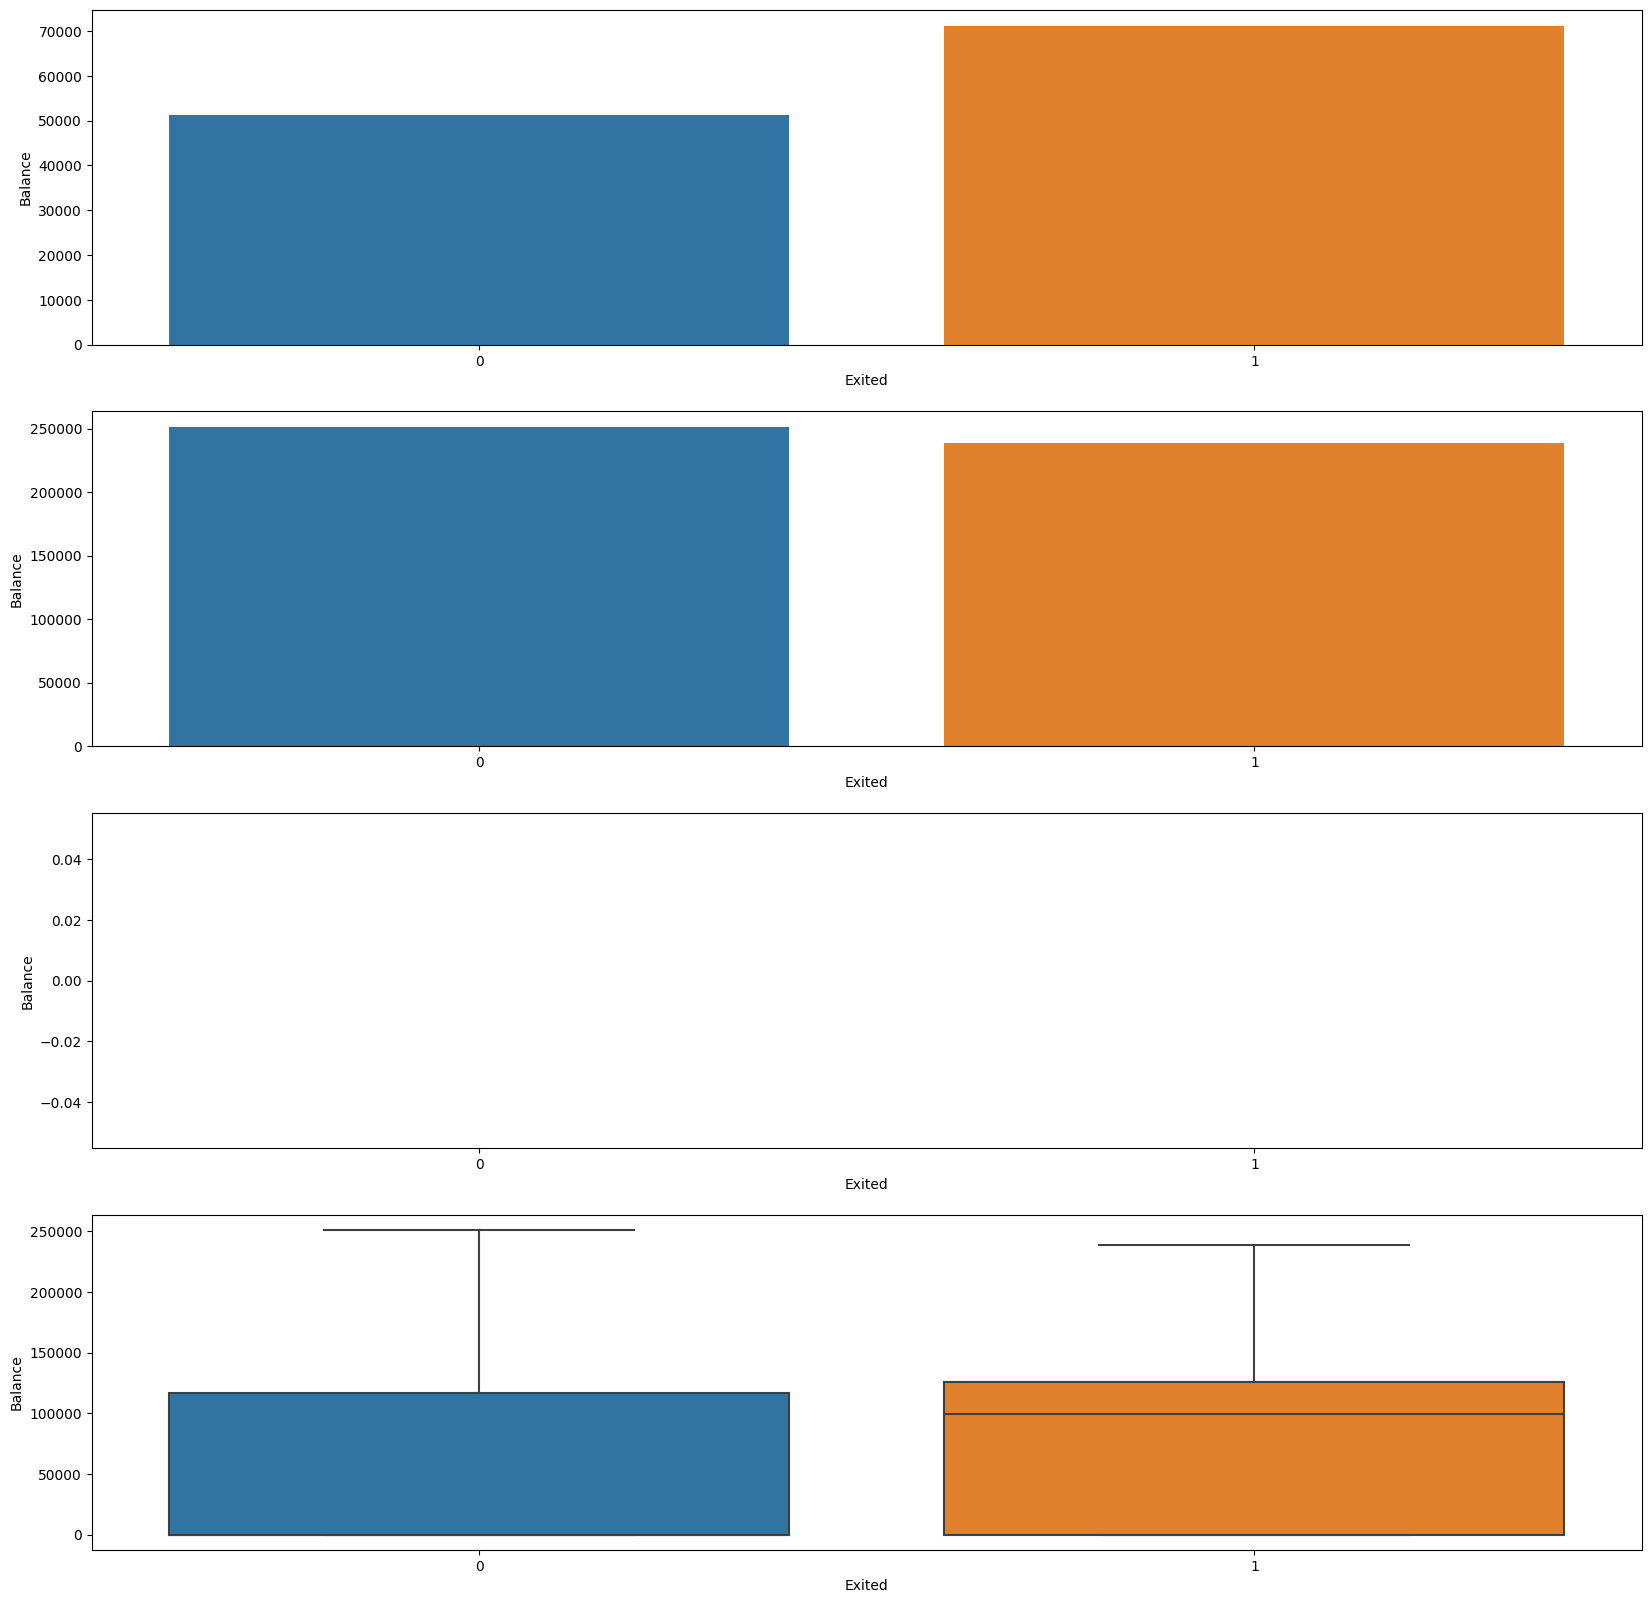

In [19]:
bal_avg = pd.DataFrame(train.groupby('Exited')['Balance'].mean().reset_index().sort_values(by = 'Balance',ascending = True))
bal_max = pd.DataFrame(train.groupby('Exited')['Balance'].max().reset_index().sort_values(by = 'Balance',ascending = True))
bal_min = pd.DataFrame(train.groupby('Exited')['Balance'].min().reset_index().sort_values(by = 'Balance',ascending = True))

fig, axes = plt.subplots(4,1, figsize = (20,20))
sns.barplot(x = 'Exited', y = 'Balance' ,data = bal_avg, ax = axes[0])
sns.barplot(x = 'Exited', y = 'Balance' ,data = bal_max, ax = axes[1])
sns.barplot(x = 'Exited', y = 'Balance' ,data = bal_min, ax = axes[2])
sns.boxplot(x = 'Exited', y ='Balance',data = train, ax = axes[3])

plt.show()

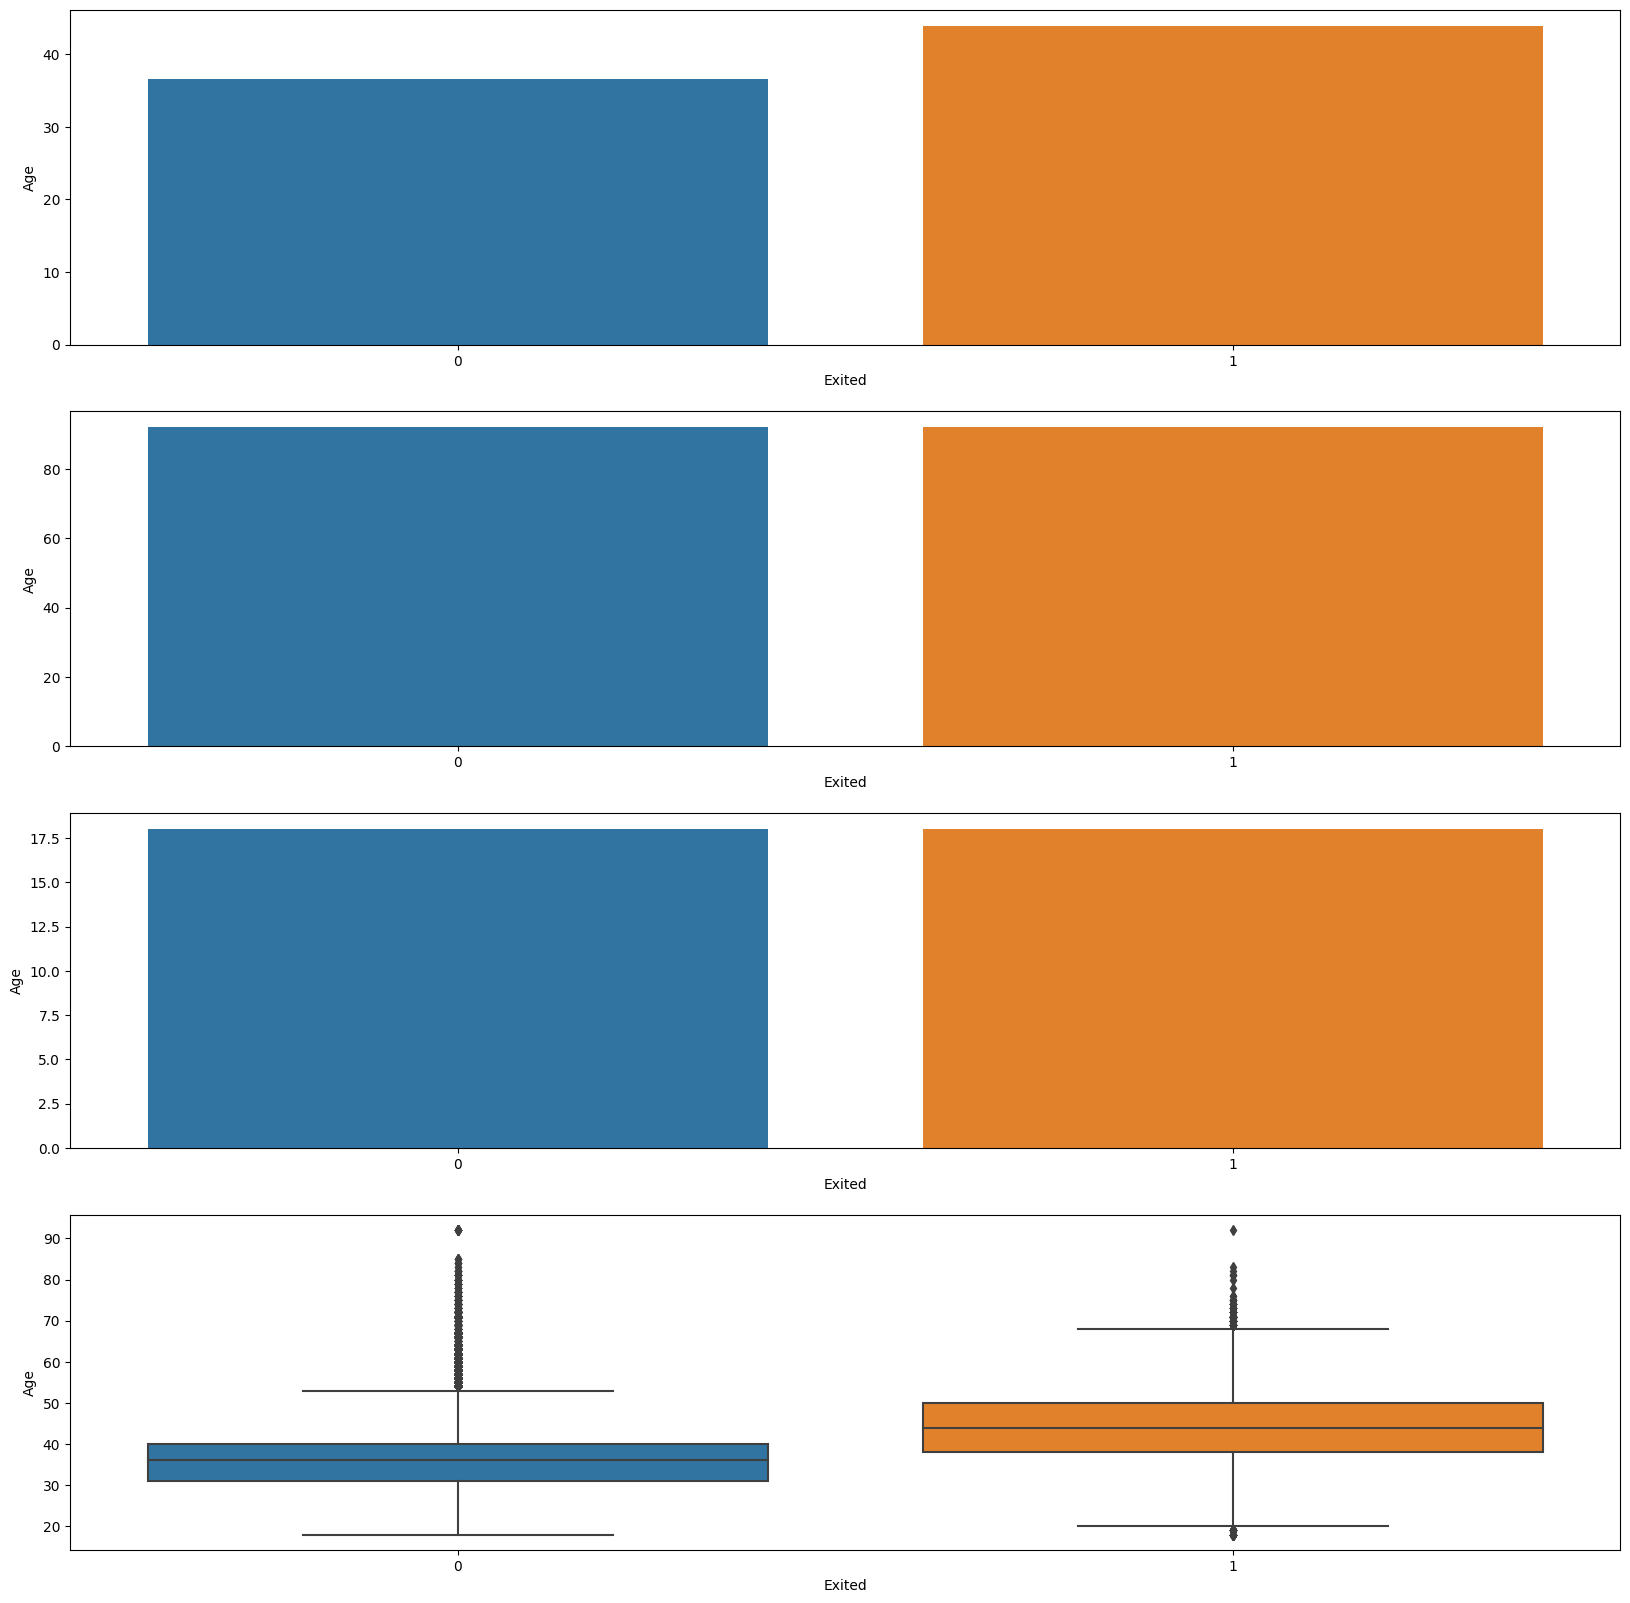

In [20]:
Age_avg = pd.DataFrame(train.groupby('Exited')['Age'].mean().reset_index().sort_values(by = 'Age',ascending = True))
Age_max = pd.DataFrame(train.groupby('Exited')['Age'].max().reset_index().sort_values(by = 'Age',ascending = True))
Age_min = pd.DataFrame(train.groupby('Exited')['Age'].min().reset_index().sort_values(by = 'Age',ascending = True))

fig, axes = plt.subplots(4,1, figsize = (20,20))
sns.barplot(x = 'Exited', y = 'Age' ,data = Age_avg, ax = axes[0])
sns.barplot(x = 'Exited', y = 'Age' ,data = Age_max, ax = axes[1])
sns.barplot(x = 'Exited', y = 'Age' ,data = Age_min, ax = axes[2])
sns.boxplot(x = 'Exited', y ='Age',data = train, ax = axes[3])

plt.show()

In [21]:
train = train.drop(['CustomerId'], axis = 1)

In [22]:
train['Surname'].value_counts()

Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: Surname, Length: 2797, dtype: int64

In [23]:
train = train.drop(['Surname'], axis = 1)

In [24]:
train['Geography'].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

In [25]:
pd.crosstab(train['Geography'], train['Exited'])

Exited         0      1
Geography              
France     78643  15572
Germany    21492  13114
Spain      29978   6235

In [26]:
train['Exited'].value_counts()

0    130113
1     34921
Name: Exited, dtype: int64

In [27]:
train.columns

Index(['id', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [28]:
cat_train = ['Tenure',  'NumOfProducts',
       'HasCrCard', 'IsActiveMember']

for x in cat_train:
  ct = pd.crosstab(train[x], train['Exited'])
  print("\n")
  print(ct)
  print("\n")



Exited      0     1
Tenure             
0        3731  1276
1       12970  3790
2       14529  3516
3       12820  3810
4       13580  3974
5       13468  3800
6       12677  3145
7       14469  3341
8       14052  3468
9       13165  3544
10       4652  1257




Exited             0      1
NumOfProducts              
1              50516  26858
2              79198   5093
3                340   2554
4                 59    416




Exited         0      1
HasCrCard              
0.0        31371   9235
1.0        98742  25686




Exited              0      1
IsActiveMember              
0.0             58261  24624
1.0             71852  10297




<Axes: xlabel='IsActiveMember', ylabel='count'>

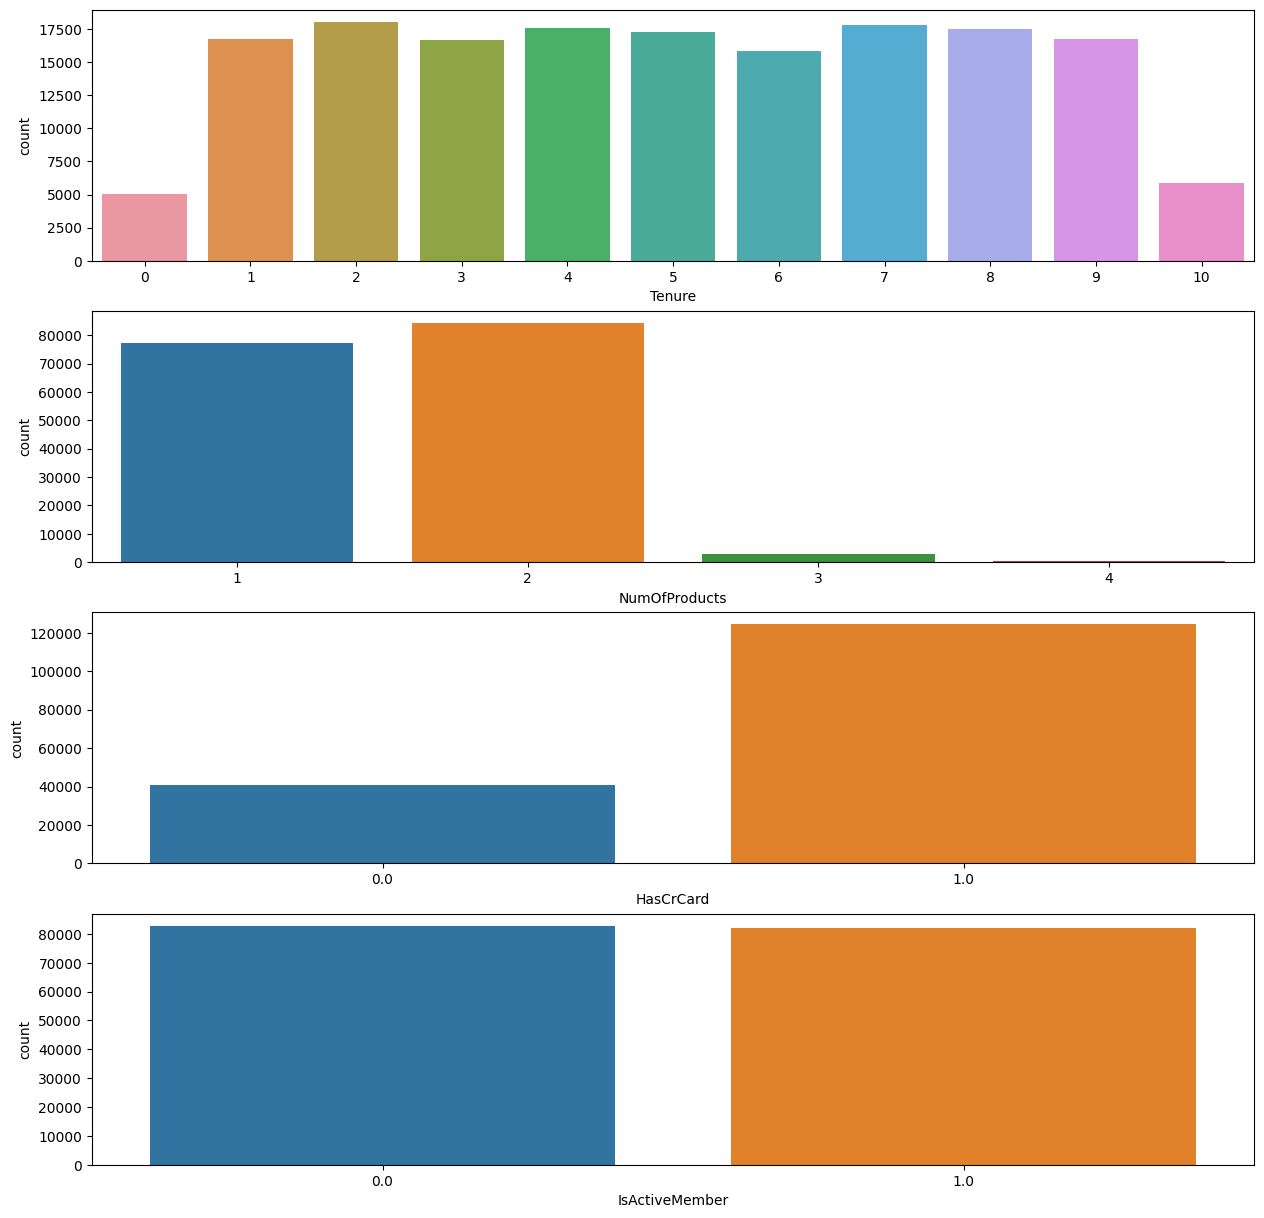

In [29]:
fig, axes = plt.subplots(4,1, figsize = (15,15))
sns.countplot(x = 'Tenure', data = train, ax = axes[0])
sns.countplot(x = 'NumOfProducts', data = train, ax = axes[1])
sns.countplot(x = 'HasCrCard', data = train, ax = axes[2])
sns.countplot(x = 'IsActiveMember', data = train, ax = axes[3])

## **Preprocessing**

In [30]:
train = pd.get_dummies(train)

In [31]:
train.columns

Index(['id', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [32]:
train.describe()

id    CreditScore            Age         Tenure  \
count  165034.0000  165034.000000  165034.000000  165034.000000   
mean    82516.5000     656.454373      38.125888       5.020353   
std     47641.3565      80.103340       8.867205       2.806159   
min         0.0000     350.000000      18.000000       0.000000   
25%     41258.2500     597.000000      32.000000       3.000000   
50%     82516.5000     659.000000      37.000000       5.000000   
75%    123774.7500     710.000000      42.000000       7.000000   
max    165033.0000     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  Geography_France  Geography_Germany  \
count    165034.000000  165034.000000     165034.000000      165034.000000   
mean     112574.822734       0.211599          0.570882           0.209690   
std       50292.865585       0.408443          0.494952           0.407089   
min          11.580000       0.000000          0.000000           0.000000   
25%       74637.570000       0.000000          0.000000           0.000000   
50%      117948.000000       0.000000          1.000000           0.000000   
75%      155152.467500       0.000000          1.000000           0.000000   
max      199992.480000       1.000000          1.000000           1.000000   

       Geography_Spain  Gender_Female    Gender_Male  
count    165034.000000  165034.000000  165034.000000  
mean          0.219428       0.435571       0.564429  
std           0.413860       0.495833       0.495833  
min           0.000000       0.000000       0.000000  
25%           0.000000       0.000000       0.000000  
50%           0.000000       0.000000       1.000000  
75%           0.000000       1.000000       1.000000  
max           1.000000       1.000000       1.000000

In [33]:
#feature engineering
train['Credit_Score_Category'] = pd.cut(train['CreditScore'], bins=[0, 500, 700, 800, 850], labels=[0,1,2,3])
train['Age_category'] = pd.cut(train['Age'], bins=[0,20, 40, 60, 80, 100], labels = [0,1,2,3,4])
train['Balance_Income_Ratio'] = train['Balance'] / train['EstimatedSalary']
train['Balance_NumOfProducts'] = train['Balance'] * train['NumOfProducts']
train['Balance_Credit_Score_Ratio'] = train['Balance'] / train['CreditScore']

In [34]:
train

id  CreditScore   Age  Tenure    Balance  NumOfProducts  \
0            0          668  33.0       3       0.00              2   
1            1          627  33.0       1       0.00              2   
2            2          678  40.0      10       0.00              2   
3            3          581  34.0       2  148882.54              1   
4            4          716  33.0       5       0.00              2   
...        ...          ...   ...     ...        ...            ...   
165029  165029          667  33.0       2       0.00              1   
165030  165030          792  35.0       3       0.00              1   
165031  165031          565  31.0       5       0.00              1   
165032  165032          554  30.0       7  161533.00              1   
165033  165033          850  31.0       1       0.00              1   

        HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0             1.0             0.0        181449.97       0                 1   
1             1.0             1.0         49503.50       0                 1   
2             1.0             0.0        184866.69       0                 1   
3             1.0             1.0         84560.88       0                 1   
4             1.0             1.0         15068.83       0                 0   
...           ...             ...              ...     ...               ...   
165029        1.0             1.0        131834.75       0                 0   
165030        0.0             0.0        131834.45       0                 1   
165031        1.0             1.0        127429.56       0                 1   
165032        0.0             1.0         71173.03       0                 0   
165033        1.0             0.0         61581.79       1                 1   

        Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  \
0                       0                0              0            1   
1                       0                0              0            1   
2                       0                0              0            1   
3                       0                0              0            1   
4                       0                1              0            1   
...                   ...              ...            ...          ...   
165029                  0                1              1            0   
165030                  0                0              0            1   
165031                  0                0              0            1   
165032                  0                1              1            0   
165033                  0                0              0            1   

       Credit_Score_Category Age_category  Balance_Income_Ratio  \
0                          1            1              0.000000   
1                          1            1              0.000000   
2                          1            1              0.000000   
3                          1            1              1.760655   
4                          2            1              0.000000   
...                      ...          ...                   ...   
165029                     1            1              0.000000   
165030                     2            1              0.000000   
165031                     1            1              0.000000   
165032                     1            1              2.269582   
165033                     3            1              0.000000   

        Balance_NumOfProducts  Balance_Credit_Score_Ratio  
0                        0.00                    0.000000  
1                        0.00                    0.000000  
2                        0.00                    0.000000  
3                   148882.54                  256.252220  
4                        0.00                    0.000000  
...                       ...                         ...  
165029                   0.00                    0.000000  
165030                  

In [35]:
scl = MinMaxScaler()
scl_train = scl.fit_transform(train)
scl_train = pd.DataFrame(scl_train, columns = train.columns)

In [36]:
x = scl_train.drop(['Exited'], axis = 1)
y = scl_train['Exited']

In [37]:
x.shape

(165034, 19)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

## **Model Developement**

In [ ]:
#clf1 = LogisticRegression()
#cllf2 = SVC()
#clf3 = KNeighborsClassifier()
#clf4 =  DecisionTreeClassifier()
'''
clf5 = RandomForestClassifier()
clf6 = GradientBoostingClassifier()
clf7 = AdaBoostClassifier()

classifiers = [clf5, clf6, clf7]

for var in classifiers:
  var.fit(x_train, y_train)
  pred = var.predict(x_test)
  print(var.score(x_test, y_test))
'''

'\nclf5 = RandomForestClassifier()\nclf6 = GradientBoostingClassifier()\nclf7 = AdaBoostClassifier()\n\nclassifiers = [clf5, clf6, clf7]\n\nfor var in classifiers:\n  var.fit(x_train, y_train)\n  pred = var.predict(x_test)\n  print(var.score(x_test, y_test))\n'

In [ ]:
#Using xgboost
xgb = XGBClassifier(n_estimators = 100)
xgb.fit(x_train, y_train)
xgb.score(x_test,y_test)

0.8639682491592693

In [ ]:
y_pred = xgb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92     26052
         1.0       0.73      0.56      0.64      6955

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.78     33007
weighted avg       0.86      0.86      0.86     33007



In [ ]:
#Building a Neural Network using Keras API of tensorflow
ann = Sequential([
    Dense(units = 32, input_shape = (19,), activation = 'relu'),
    Dropout(0.2),
    Dense(units = 32, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                640       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1729 (6.75 KB)
Trainable params: 1729 (6.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
ann.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(x_train, y_train, epochs = 30, batch_size =  64)

Epoch 1/30
2063/2063 [==============================] - 5s 2ms/step - loss: 0.4073 - accuracy: 0.8282
Epoch 2/30
2063/2063 [==============================] - 5s 2ms/step - loss: 0.3545 - accuracy: 0.8504
Epoch 3/30
2063/2063 [==============================] - 6s 3ms/step - loss: 0.3463 - accuracy: 0.8544
Epoch 4/30
2063/2063 [==============================] - 4s 2ms/step - loss: 0.3420 - accuracy: 0.8556
Epoch 5/30
2063/2063 [==============================] - 5s 3ms/step - loss: 0.3392 - accuracy: 0.8575
Epoch 6/30
2063/2063 [==============================] - 6s 3ms/step - loss: 0.3374 - accuracy: 0.8582
Epoch 7/30
2063/2063 [==============================] - 4s 2ms/step - loss: 0.3364 - accuracy: 0.8586
Epoch 8/30
2063/2063 [==============================] - 5s 2ms/step - loss: 0.3355 - accuracy: 0.8586
Epoch 9/30
2063/2063 [==============================] - 6s 3ms/step - loss: 0.3352 - accuracy: 0.8596
Epoch 10/30
2063/2063 [==============================] - 5s 2ms/step - loss: 0.334

In [ ]:
'''eval_res = ann.evaluate(x_test, y_test)
print(f"test loss : {eval_res[0]}")
print(f"test accuracy : {eval_res[1]}")'''

'eval_res = ann.evaluate(x_test, y_test)\nprint(f"test loss : {eval_res[0]}")\nprint(f"test accuracy : {eval_res[1]}")'

In [ ]:
#y_pred1 = ann.predict(x_test)